<a href="https://colab.research.google.com/github/KhuyenLE-maths/A-quick-overview-of-ResNet-models/blob/main/A_quick_overview_of_ResNet_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Introduction
In previous posts, we discovered some popular convolutional neural networks (CNNs) such as LeNet, AlexNet, VGG, NiN, GoogLeNet at which the model performance increases proportionally with the number of layers. One may ask if models can learn better with a higher number of layers? Generally, it is not always correct. Because the vanishing gradient phenomena in models, which have a large layer number, harms the convergence of these models from the beginning. The following figure is a piece of concrete evidence for that. The model with 56 layers underperformed the one with 20 layers.

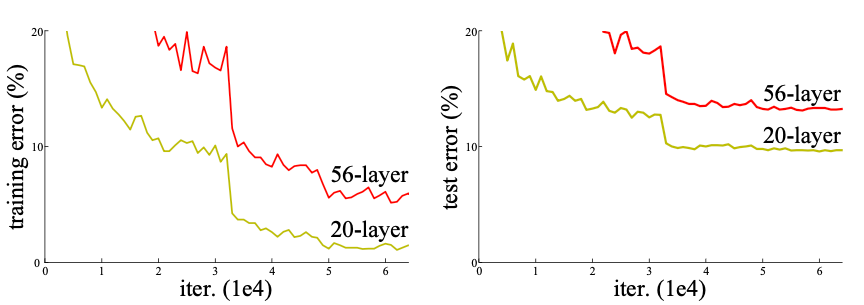

To overcome this drawback, a researcher group of Microsoft proposed a deep convolutional neural network, namely ResNet, in 2015. This network is composed of multiple residual blocks regarding the input layers, and their operating principle is concerned with optimizing a residual function. This special architecture allows gaining accuracy from increasing layer depth. Consequently, this model won 1st place in the ILSVRC and COCO 2015 competitions on tasks on ImageNet detection, ImageNet localization, COCO detection, and COCO segmentation.

In the original paper, the authors proposed to fit the add layers by residual mapping. Typically, if we denote H(x) by the underlying mapping, then the residual mapping is determined by F(x) := H(x) - x. A residual learning block has the following form (Figure 2):

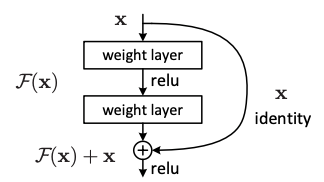

A part of this block consists of an identity mapping layer and the other layers are copied from the learned shallower model.
- When the input x and the output y = H(x) have the same dimension, the residual block function is defined by:
$$ y = \mathcal{F}(x, \{W_i\}) + x $$
where F(x, {W_i}) represents the residual mapping to be learned, W_i denotes the weight of i^{th} layer in this block.
- When the input x and the output y do not have the same dimension, we can use a linear projection W_s into the identity function to match the dimensions:
$$ y = \mathcal{F}(x, \{W_i\}) + W_s x $$
A residual block may have two or more layers. In the original article, the authors built different networks using residual blocks of size two and three layers (Table 1):

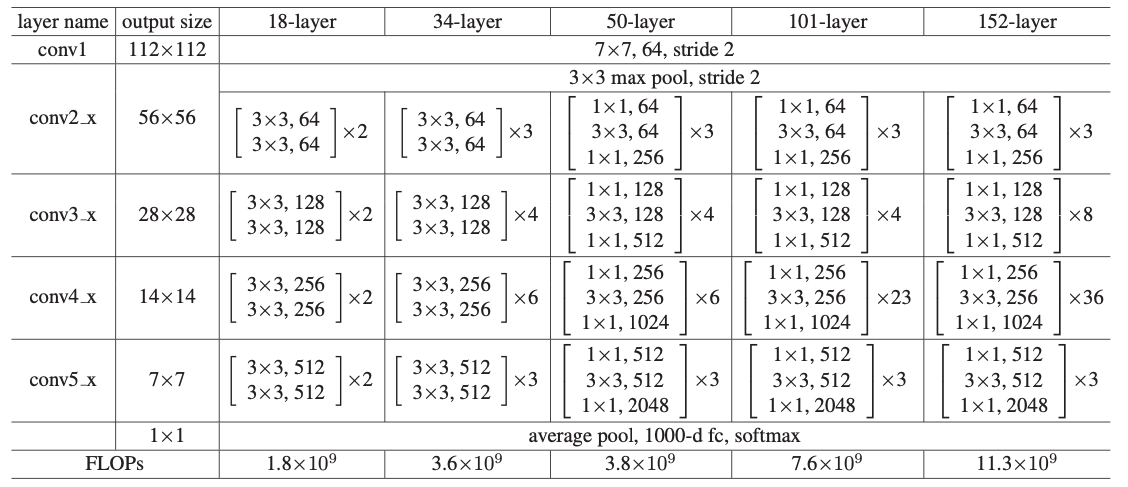

The table above shows different architectures of ResNet which were used for classifying the ImageNet dataset. The number of layers varies from 18 to 152. The residual blocks have two or three layers:

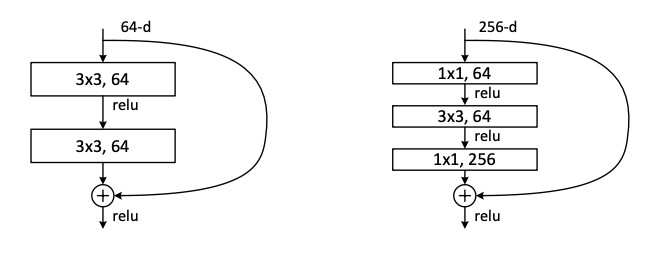

The following figure visualizes the architecture residual network with 34 layers (ResNet-34) in comparison to a plain network with 34 layers and the VGG-19 model.

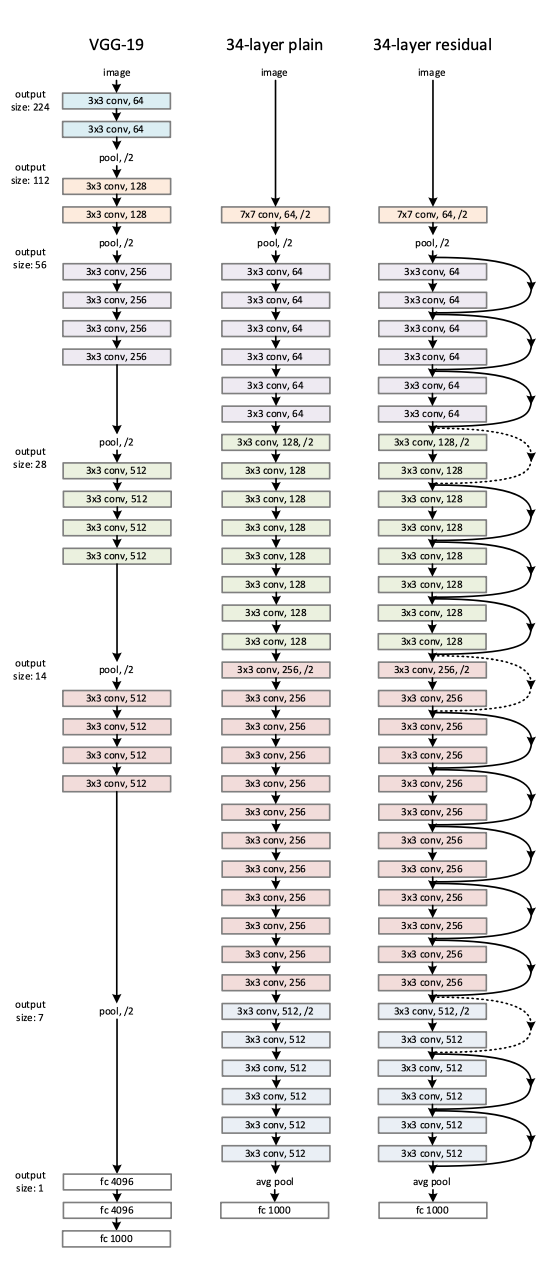

In summary:
- In ResNet models, all convolutional layers apply the same convolutional window of size 3 × 3, the number of filters increases following the depth of networks, from 64 to 512 (for ResNet-18 and ResNet-34), from 64 to 2048 (for ResNet-50, ResNet-101, and ResNet-152).
- In all models, there is only one max-pooling layer with pooling size 3 × 3, and a stride of 2 is applied after the first layer. Therefore, reducing the resolution of the input is significantly limited during the training process.
- At the end of all models, the average pooling layer is applied to replace fully connected layers. This replacement has some advantages. Firstly, there is no parameter to optimize in this layer, hence it helps to reduce the model complexity. Secondly, this layer is more native to enforce the correspondences between feature maps and categories.
- The output layer has 1000 neurons which are corresponding to the number of categories in the ImageNet dataset. Besides, a softmax activation function is applied in this layer to give the probability that the input belonging to each class.


# II. Import some avaiblle ResNet models on Keras
There are different versions of ResNet models which are available on the Keras platform, such as ResNet-50, ResNet-101, and ResNet-152. They can be imported easily from the module tensorflow.keras.applications:

**Import the ResNet-50 model:**


In [1]:
from tensorflow.keras.applications import ResNet50
ResNet_50 = ResNet50(weights = None)

In [2]:
ResNet_50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

**Import the ResNet-101 model:**

In [4]:
from tensorflow.keras.applications import ResNet101
ResNet_101 = ResNet101(weights = None)

In [5]:
ResNet_101.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

**Import the ResNet-152 model:**

In [6]:
from tensorflow.keras.applications import ResNet152
ResNet_152 = ResNet152()

242900992/242900224 [==============================] - 2s 0us/step


In [7]:
ResNet_152.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

# III. Conclusion
In this post, we have discovered the architectures of different ResNet models. They are composed of multiple residual blocks, whose construction is related to learning residual functions. This architecture allows avoiding overfitting with additional layers. Especially, some ResNet models as ResNet-50, ResNet-101 and ResNet-152 are available on Keras. Hence, they can be imported easily without implementing from scratch as we did in the previous posts. :-)

I hope this post is helpful for you. Don't hesitate to [contact me](https://lekhuyen.medium.com/) if you have any questions.

Thanks for reading!

**References:**

[1] He, Kaiming, et al. "Deep residual learning for image recognition." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.